In [105]:
import ee

In [106]:
ee.Authenticate()

True

In [107]:
ee.Initialize(project='ee-abhinav4437')

In [108]:
print(ee.String('Hello from the Earth Engine servers!').getInfo())


Hello from the Earth Engine servers!


In [109]:
import geemap
import matplotlib.pyplot as plt
import pandas as pd

In [110]:
# # Initialize a map object.
# m = geemap.Map()

# # Define an example image.
# img = ee.Image.random()

# # Add the image to the map.
# m.add_layer(img, None, 'Random image')

# # Display the map (you can call the object directly if it is the final line).
# display(m)

In [111]:
# # List of years
# years = list(range(2014, 2024))

# # Dictionary to store DataFrames
# dfs = {}

# # Load each CSV file into a DataFrame and store in the dictionary
# for year in years:
#     file_path = f'{year}_us.csv'
#     dfs[year] = pd.read_csv(file_path)
#     print(year, "DONE")

In [126]:
admin1 = ee.FeatureCollection("projects/sat-io/open-datasets/geoboundaries/CGAZ_ADM1")
ntl_collection = ee.ImageCollection("NOAA/VIIRS/DNB/ANNUAL_V21")
modis_landcover = ee.ImageCollection('MODIS/061/MCD12Q1')

In [127]:
region = 'Dow Chemicals'
admin1Filtered = admin1.filter(ee.Filter.eq('shapeName', region))

In [128]:
m = geemap.Map()

In [129]:
# coordinates = [-84.2234, 43.6003]
# geometry = ee.Geometry.Polygon([
#     [
#         [-84.23948213192853, 43.60918457051301],
#         [-84.23828050228985, 43.5989294941666],
#         [-84.2080680999461, 43.597810652808235],
#         [-84.20781060788067, 43.60700939737075],
#         [-84.21201631161603, 43.61191896229024],
#         [-84.22952577206524, 43.612105393566225],
#         [-84.23347398373517, 43.61024105480014],
#         [-84.23639222714337, 43.610924652391276],
#         [-84.23948213192853, 43.60918457051301]
#     ]
# ])


In [130]:
def ret_geometry(lon, lat):
    print([-84.2234, 43.6003])
    center = ee.Geometry.Point([lon, lat])

    # Define the radius (in meters) for the circle
    radius = 2500  # e.g., 5000 meters (5 km)

    # Create a circular geometry by buffering the center point
    geometry = center.buffer(radius)
    return geometry

In [131]:
# Function to calculate night light (SOL)
def calculate_sol(image, geometry, resolution, band):
    stats = image.reduceRegion(
        reducer=ee.Reducer.sum(),
        geometry=geometry,
        scale=resolution,
        maxPixels=1e10,
        tileScale=16
    )
    sol = stats.getNumber(band)
    feature = ee.Feature(None, {
        'sol': sol,
        'system:time_start': image.get('system:time_start')
    })
    return feature


In [132]:
# import pandas as pd
pd.set_option('display.max_columns', None)

# List of years
years = list(range(2014, 2023))

# Dictionary to store DataFrames
dfs = {}

# Load each CSV file into a DataFrame, set dtype to prevent mixed-type warning
for year in years:
    file_path = f'{year}_us.csv'
    dfs[year] = pd.read_csv(file_path, low_memory=False)  # Suppress the DtypeWarning
    print(year, "DONE")

2014 DONE
2015 DONE
2016 DONE
2017 DONE
2018 DONE
2019 DONE
2020 DONE
2021 DONE
2022 DONE


In [118]:
start_date = 
end_date = 
band = 'average'

geometry = ret_geometry()
ntl_filtered = ntl_collection.filter(ee.Filter.date(start_date, end_date))\
                            .filter(ee.Filter.bounds(geometry))\
                            .select(band)
print('Filtered NTL collection', ntl_filtered.getInfo())

# Get projection information
projection = ntl_filtered.first().projection()
resolution = projection.nominalScale().getInfo()
print('NTL Image Resolution:', resolution)
# Map the function over the filtered NTL collection
ntl_time_series = ntl_filtered.map(calculate_sol)
print('SOL (Sum-of-Lights) Time Series:', ntl_time_series.getInfo())

# Extract time series data and plot it using matplotlib
# Convert the feature collection to a list of features
features = ntl_time_series.getInfo()['features']
data = []

for feature in features:
    timestamp = feature['id']
    sol_value = feature['properties']['sol']
    data.append({'timestamp': timestamp, 'sol': sol_value})
    print(timestamp, sol_value)

# Convert the list to a pandas DataFrame
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['timestamp'], format='%Y%m%d')
df = df.sort_values(by='date')
print(df)

In [119]:


# Define your Nightlight function here if not defined
# def Nightlight(row):
#     return some_rational_number_based_on_row  # Replace with your actual logic

# Apply Nightlight function and add result as a new column
for year in years:
    dfs[year]['Nightlight'] = dfs[year].apply(Nightlight, axis=1)


2014 DONE
2015 DONE
2016 DONE
2017 DONE
2018 DONE
2019 DONE
2020 DONE
2021 DONE
2022 DONE
[-93.19968, 45.05013]
4581.2342204411825
[-77.282102, 37.341835]
900.9998651389983
[-131.63331, 55.3376]
757.9754570802052
[-98.046669, 43.688255]
1699.6995837753898
[-85.236197, 37.577067]
920.0307636985592
[-81.66411, 35.74948]
1364.0884661078449
[-71.192441, 41.709989]
1195.3670991163626
[-86.809222, 33.741056]
238.0087561768644
[-116.586195, 47.323441]
599.2948659063554
[-88.53064, 44.0395]
2711.605278411566
[-88.202211, 41.411985]
4264.392569048266
[-76.06899, 42.99541]
547.7422965157266
[-87.266962, 38.519307]
707.1968755364419
[-117.91115, 33.9968]
6227.31131225661
[-86.4026, 36.3246]
397.13640257470746
[-79.760048, 40.599559]
1695.2285907932355
[-90.57216, 30.07155]
4075.050819979461
[-94.362912, 39.095144]
1420.170547423643
[-77.072058, 40.233481]
1303.9457138701985
[-92.6257, 41.28032]
1020.6468674133805
[-87.55699, 38.10814]
892.461422130407
[-84.57548, 37.86167]
1236.8300979974222
[-88

In [120]:
combined_df = pd.concat(dfs.values(), ignore_index=True)

In [134]:
import numpy as np

In [121]:

combined_df = combined_df[combined_df['Nightlight']>2]



In [135]:
combined_df['Nightlight'] = np.log(combined_df['Nightlight'])
combined_df['107. TOTAL RELEASES'] = np.log(combined_df['107. TOTAL RELEASES'])

In [137]:
combined_df['119. PRODUCTION WSTE (8.1-8.7)'] = np.log(combined_df['119. PRODUCTION WSTE (8.1-8.7)'])#119. PRODUCTION WSTE (8.1-8.7)

In [122]:
pd.set_option('display.max_rows', None)


In [138]:
# Calculate correlation of target_column with all other columns
pcc = combined_df.apply(pd.to_numeric, errors='coerce').corr()['Nightlight']

# Display the results
print(pcc)

1. YEAR                               -0.063505
2. TRIFD                                    NaN
3. FRS ID                             -0.103373
4. FACILITY NAME                            NaN
5. STREET ADDRESS                           NaN
6. CITY                                     NaN
7. COUNTY                                   NaN
8. ST                                       NaN
9. ZIP                                 0.270340
10. BIA                                0.835452
11. TRIBE                                   NaN
12. LATITUDE                          -0.105680
13. LONGITUDE                         -0.169614
14. HORIZONTAL DATUM                        NaN
15. PARENT CO NAME                          NaN
16. PARENT CO DB NUM                  -0.013983
17. STANDARD PARENT CO NAME                 NaN
18. FOREIGN PARENT CO NAME                  NaN
19. FOREIGN PARENT CO DB NUM           0.040281
20. STANDARD FOREIGN PARENT CO NAME         NaN
21. FEDERAL FACILITY                    

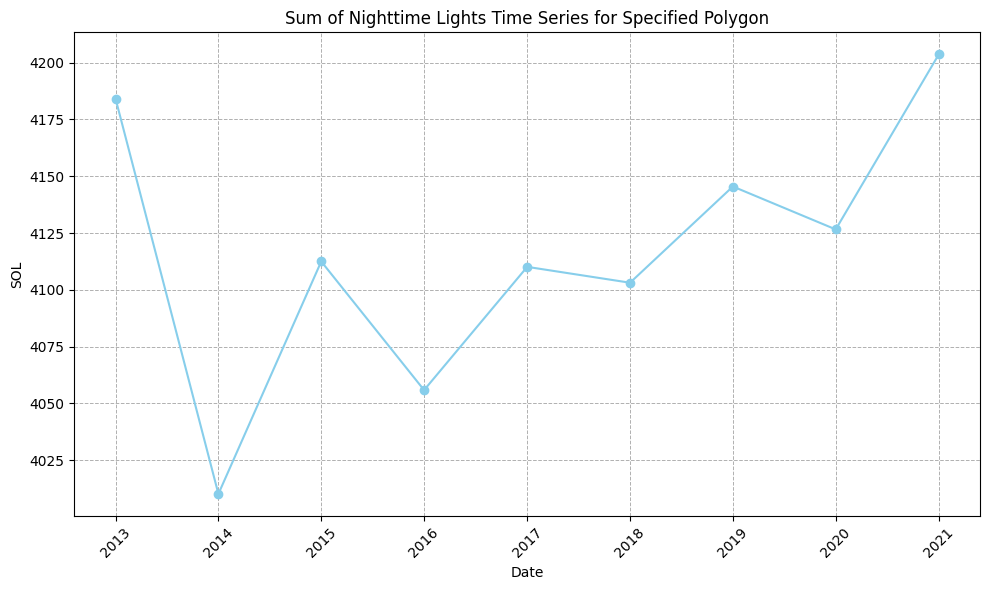

In [124]:
# Plot the SOL time series with a line graph for better clarity
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['sol'], marker='o', linestyle='-', color='skyblue')

# Set titles and labels
plt.title(f'Sum of Nighttime Lights Time Series for Specified Polygon')
plt.xlabel('Date')
plt.ylabel('SOL')
plt.grid(True, axis='both', linestyle='--', linewidth=0.7)

# Adjust the x-axis to show date labels at a readable angle
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [125]:
Map = geemap.Map(center=[43.6003, -84.2234], zoom=10)
Map.addLayer(geometry, {'color': 'red'}, 'Circle Geometry')
Map.addLayer(center, {'color': 'blue'}, 'Center Point')
Map.centerObject(geometry)

# Show the map in a Jupyter notebook
Map

NameError: name 'center' is not defined

In [21]:
# Define a list of points (longitude, latitude)
points_list = [
    [-84.2234, 43.6003],
    [-82.2383, 43.5989],
    [-86.2081, 43.5978]
]

# Define the radius (in meters) for each circle
radius = 5000  # 5 km

# Create a list of geometries (buffered circles)
circles = [ee.Geometry.Point(point).buffer(radius) for point in points_list]

# Union all the circular geometries into one geometry
# Start with the first circle and iteratively combine with others
union_geometry = circles[0]
for circle in circles[1:]:
    union_geometry = union_geometry.union(circle)

# Visualize the union geometry on the map
Map = geemap.Map(center=[43.6003, -84.2234], zoom=10)
Map.addLayer(union_geometry, {'color': 'red'}, 'Union of Circles')

# Add the original points for reference
for point in points_list:
    Map.addLayer(ee.Geometry.Point(point), {'color': 'blue'}, 'Point')

Map.centerObject(union_geometry)

# Display the map (if in Jupyter, return the map)
Map


Map(center=[43.6003, -84.2234], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

In [76]:
dfs[2014]['Nightlight']

KeyError: 'Nightlight'